In [2]:
import tensorflow as tf
import importlib
from model.model1D import Unet,Unet_Model
import model.model1D
importlib.reload(model.model1D)
try: 
    del unet
except:
    pass
import numpy as np


In [3]:
unet = Unet(n_classes=5,n_filters=8)
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
unet.model((8640,2)).summary()

5
4
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8640, 2)]    0           []                               
                                                                                                  
 downsampling_block (Downsampli  ((None, 4320, 8),   256         ['input_1[0][0]']                
 ngBlock)                        (None, 8640, 8))                                                 
                                                                                                  
 downsampling_block_1 (Downsamp  ((None, 2160, 16),  1184        ['downsampling_block[0][0]']     
 lingBlock)                      (None, 4320, 16))                                                
                                                                                          

In [4]:
import importlib
import dataloader.dataloader
import configs.config
from dataloader.dataloader import Series,TrainSerie,Dataset
importlib.reload(dataloader.dataloader)
importlib.reload(configs.config)
try: 
    del series
except:
    pass

from configs.config import CFG
from utils import config
config = config.Config.from_json(CFG)

In [5]:
series = Series(config.data,config.paths)
series.createSeries()
ds = Dataset(series)
ds.split_dataset()


In [6]:
X_train = ds.X_train
y_train = ds.y_train
X_test = ds.X_test
y_test = ds.y_test

X_train

array([[[-0.28454182,  0.49862242],
        [-0.53027923, -0.1297884 ],
        [-0.88858353, -0.06242571],
        ...,
        [-0.44686921, -0.02643743],
        [-0.39326298, -0.12425174],
        [ 0.0614423 ,  0.67302718]],

       [[ 0.91086096, -0.36509642],
        [ 0.91044798, -0.36509642],
        [ 0.90935943, -0.36509642],
        ...,
        [ 1.69683109, -0.36509642],
        [ 1.70603362, -0.36509642],
        [ 1.70724869, -0.36509642]],

       [[ 0.15399279, -0.06980793],
        [ 0.26066814,  0.17103675],
        [ 0.46628681, -0.04027908],
        ...,
        [ 1.27404462, -0.15562614],
        [ 0.86030552,  0.15996343],
        [ 1.10631746,  1.1519482 ]],

       ...,

       [[ 1.33762206, -0.31711204],
        [ 1.33747883, -0.31618926],
        [ 1.33786077, -0.31711204],
        ...,
        [-0.87523688, -0.29681095],
        [-0.87871259, -0.35586865],
        [-0.87686015, -0.35586865]],

       [[-0.61974072, -0.33741312],
        [-0.59312858, -0.32

In [7]:
history = unet.fit(X_train,y_train,epochs = 100)

Epoch 1/100
5
4
5
4
8/8 [==============================] - 5s 219ms/step - loss: 1.8348 - accuracy: 0.1942
Epoch 2/100
8/8 [==============================] - 2s 221ms/step - loss: 1.4334 - accuracy: 0.5217
Epoch 3/100
8/8 [==============================] - 2s 225ms/step - loss: 1.1570 - accuracy: 0.6199
Epoch 4/100
8/8 [==============================] - 2s 268ms/step - loss: 0.9796 - accuracy: 0.6796
Epoch 5/100
8/8 [==============================] - 2s 235ms/step - loss: 0.8681 - accuracy: 0.7374
Epoch 6/100
8/8 [==============================] - 2s 241ms/step - loss: 0.8031 - accuracy: 0.7757
Epoch 7/100
8/8 [==============================] - 2s 247ms/step - loss: 0.7324 - accuracy: 0.8493
Epoch 8/100
8/8 [==============================] - 2s 235ms/step - loss: 0.6101 - accuracy: 0.8953
Epoch 9/100
8/8 [==============================] - 2s 254ms/step - loss: 0.5730 - accuracy: 0.8841
Epoch 10/100
8/8 [==============================] - 2s 236ms/step - loss: 0.5101 - accuracy: 0.9033
E

In [8]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "model/weights/cp-{epoch:04d}.ckpt"
# save weights 
unet.save_weights(checkpoint_path.format(epoch=100))

In [11]:
from datetime import datetime

In [16]:
models_path = "model/saved_models/unet_{version}_{now}"
unet.save(models_path.format(version = "v1", now = str(datetime.now().date())))

5
4


5
4
5
4
5
4
5
4
5
4
5
4


INFO:tensorflow:Assets written to: model/saved_models/unet_v1_2023-09-29\assets


INFO:tensorflow:Assets written to: model/saved_models/unet_v1_2023-09-29\assets


In [17]:
import dataloader.dataloader
importlib.reload(dataloader.dataloader)
from dataloader.dataloader import Test_Series
try: 
    del test_series
except:
    pass
test_series = Test_Series(config.data,config.paths)
test_series.createSeries()


In [18]:
test_serie  = test_series.series["038441c925bb"]
test_serie = test_serie.get_example()

In [34]:
def accuracy(real,pred):
    comp = real == pred
    return np.sum(comp)/(comp.shape[0]*comp.shape[1])


def predict(model,test_serie,dataset):

    X = test_serie.get_example()
    X = dataset._transform(X)
    print(X)
    length = X.shape[0]
    mod_length = 0 
    i = 0
    while(True):
        if length - 2**(i+1) > 0:    
            i+=1
        else:
            mod_length = 2**i
            break

    rest = length - mod_length
    mean =0
    for i in range(2):
        if i == 0:
            x_pred = X[0:mod_length]
            
        else:
            x_pred = X[i*rest:]
        
        x_pred = np.expand_dims(x_pred,axis = 0)
        pred = model.predict(x_pred)

        mean = pred/2+mean

    events = np.argmax(mean,axis = -1,keepdims=True)
    score = np.max(mean,axis=-1,keepdims=True)        
    return (events,score)


test_series_pred = {}
for serie_id, test_serie in test_series.series.items():
    test_series_pred[serie_id] = predict(unet,test_serie,ds)

[[ 1.09300236e-01 -1.64853910e-01]
 [ 1.09302623e-01 -1.66699463e-01]
 [ 1.09307398e-01 -1.65776686e-01]
 [ 1.09302623e-01 -1.68545016e-01]
 [ 1.09302623e-01 -1.66699463e-01]
 [ 1.09300236e-01 -1.64853910e-01]
 [ 1.09300236e-01 -1.64853910e-01]
 [ 1.09300236e-01 -1.63931133e-01]
 [ 1.13150737e-01 -1.59317251e-01]
 [ 1.19994747e-01 -1.64853910e-01]
 [ 1.12725821e-01 -1.53780591e-01]
 [ 1.06526347e-01 -1.65776686e-01]
 [ 1.03957755e-01 -1.63931133e-01]
 [ 1.03957755e-01 -1.67622239e-01]
 [ 1.03957755e-01 -1.67622239e-01]
 [ 1.03957755e-01 -1.67622239e-01]
 [ 1.03957755e-01 -1.66699463e-01]
 [ 1.03964917e-01 -1.64853910e-01]
 [ 1.23694327e+00 -5.99687081e-04]
 [ 1.35571440e+00 -2.11915513e-01]
 [ 1.09908195e+00 -2.08224407e-01]
 [ 1.65486230e+00 -2.70973211e-01]
 [ 1.68062461e+00 -1.45475603e-01]
 [ 9.46842733e-01 -3.00502060e-01]
 [ 7.62567724e-01 -2.89428742e-01]
 [ 7.11611246e-01 -2.55286010e-01]
 [ 7.28743947e-01 -2.58977116e-01]
 [-1.11359980e-01  2.72542166e-01]
 [-1.86266962e+00 -2

In [29]:
test_series_pred

{'038441c925bb': (array([[[1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
          [1],
         

In [32]:




y_train_pred = unet.predict(X_train)
print("train accuracy : " + str(accuracy(y_train,y_train_pred)))


y_test_pred = unet.predict(X_test)
print("test accuracy : " +  str(accuracy(y_test,y_test_pred)))

5
4
8/8 [==============================] - 1s 60ms/step
train accuracy : 1.3964296924042687
2/2 [==============================] - 0s 60ms/step
test accuracy : 1.361605461393597


In [33]:
y_train_pred

array([[[3.8144109e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         1.3411126e+00],
        [5.1566162e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         1.8888512e+00],
        [7.3822355e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         2.7971010e+00],
        ...,
        [3.4486151e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         1.2042551e+00],
        [2.4805624e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         8.8821453e-01],
        [1.7167161e+00, 1.3205452e-01, 0.0000000e+00, 0.0000000e+00,
         6.9181073e-01]],

       [[0.0000000e+00, 5.3289944e-01, 0.0000000e+00, 0.0000000e+00,
         3.9640501e-02],
        [0.0000000e+00, 2.8373640e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 3.1996367e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00],
        ...,
        [0.0000000e+00, 1.9798766e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00],
        [0.0000000e+00, 2.309866

In [20]:
test_series_pred = {}
for serie_id, test_serie in test_series.series.items():
    test_series_pred[serie_id] = predict(unet,test_serie.get_example())

KeyboardInterrupt: 

In [33]:
test_series.series.items()

dict_items([('038441c925bb', <dataloader.dataloader.TestSerie object at 0x000001F5087A7FD0>), ('03d92c9f6f8a', <dataloader.dataloader.TestSerie object at 0x000001F559088B50>)])

In [24]:
test_series_pred = {}
for serie_id, test_serie in test_series.series.items():
    X = test_serie.get_example()
    X = ds._transform(X)
    length = X.shape[0]
    mod_length = 0 
    i = 0
    while(True):
        if length - 2**(i+1) > 0:    
            i+=1
        else:
            mod_length = 2**i
            break

    rest = length - mod_length
    mean =0
    for i in range(2):
        if i == 0:
            x_pred = X[0:mod_length]
            
        else:
            x_pred = X[i*rest:]
        print(x_pred)
        print(x_pred.shape)
    

[[ 2.63670e+00  2.17000e-02]
 [ 2.63680e+00  2.15000e-02]
 [ 2.63700e+00  2.16000e-02]
 [ 2.63680e+00  2.13000e-02]
 [ 2.63680e+00  2.15000e-02]
 [ 2.63670e+00  2.17000e-02]
 [ 2.63670e+00  2.17000e-02]
 [ 2.63670e+00  2.18000e-02]
 [ 2.79800e+00  2.23000e-02]
 [ 3.08470e+00  2.17000e-02]
 [ 2.78020e+00  2.29000e-02]
 [ 2.52050e+00  2.16000e-02]
 [ 2.41290e+00  2.18000e-02]
 [ 2.41290e+00  2.14000e-02]
 [ 2.41290e+00  2.14000e-02]
 [ 2.41290e+00  2.14000e-02]
 [ 2.41290e+00  2.15000e-02]
 [ 2.41320e+00  2.17000e-02]
 [ 4.98744e+01  3.95000e-02]
 [ 5.48498e+01  1.66000e-02]
 [ 4.40993e+01  1.70000e-02]
 [ 6.73813e+01  1.02000e-02]
 [ 6.84605e+01  2.38000e-02]
 [ 3.77219e+01  7.00000e-03]
 [ 3.00025e+01  8.20000e-03]
 [ 2.78679e+01  1.19000e-02]
 [ 2.85856e+01  1.15000e-02]
 [-6.60690e+00  6.91000e-02]
 [-7.99704e+01  1.32000e-02]
 [-7.99883e+01  1.36000e-02]
 [-7.99987e+01  1.34000e-02]
 [-7.99780e+01  1.35000e-02]
 [-7.99694e+01  1.33000e-02]
 [-7.99688e+01  1.32000e-02]
 [-7.99688e+01

In [9]:
test_serie_1 = TrainSerie()
serie = self.createSerie(serie_id)
serie.create_segmentation_mask(self.valid_steps)
serie.create_slices(self.steps_window,["series_id","step","timestamp"])


(59, 4320, 1)

In [90]:
#test_mask = series.series[series.series_ids[3]].mask_slices
test_mask = series.series["05e1944c3818"].mask_slices 
test_mask.shape

(92, 4320, 3)

In [81]:
test_mask[4,...,-1] 

array([0., 0., 0., ..., 1., 1., 1.])

In [82]:
np.max(test_mask[6,...,-1] == -1)

False

In [97]:
from time import time

In [123]:
def create(mask_slices):
    
    slices_len = mask_slices.shape[0]
    slices_with_zero = np.zeros(shape = (slices_len,),dtype=bool)
    for i in range(slices_len):
        slices_with_zero[i] = 1-np.max(mask_slices[i,...,-1] == -1)
    return mask_slices[slices_with_zero]

start_time = time()
slices_without_zero = create(test_mask)
print(time()-start_time)
slices_without_zero.shape

0.003017425537109375


(25, 4320, 3)

In [121]:
def create(mask_slices):
    
    slices_len = mask_slices.shape[0]
    slices_with_zero = np.zeros(shape = (slices_len,),dtype=bool)
    for i in range(slices_len):
        #slices_with_zero[i] = 1-np.max(mask_slices[i,...,-1] == -1)
        slices_with_zero[i] = 1-(-1 in  mask_slices[i,...,-1])
    return mask_slices[slices_with_zero]

start_time = time()
slices_without_zero = create(test_mask)
print(time()-start_time)
slices_without_zero.shape


0.002997875213623047


(25, 4320, 3)

In [124]:
def get_correct_slices(mask_slices):
    correct_slices = mask_slices.copy()
    deleted_indexes = []
    for i in range(correct_slices.shape[0]):
        if -1 in  correct_slices[i,...,-1]:
            deleted_indexes.append(i)
    return np.delete(correct_slices,deleted_indexes,axis = 0)

start_time = time()
slices_without_zero = get_correct_slices(test_mask)
print(time()-start_time)
slices_without_zero.shape

0.00500035285949707


(25, 4320, 3)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "d:\DEV\Projekty\PythonProjects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\pawel.dubel\AppData\Local\Temp\ipykernel_13352\2435840814.py", line 2, in <module>
    ds.split_dataset()
  File "d:\DEV\Projekty\PythonProjects\Kaggle\Detect-sleep-state\dataloader\dataloader.py", line 267, in split_dataset
  File "d:\DEV\Projekty\PythonProjects\Kaggle\Detect-sleep-state\dataloader\dataloader.py", line 275, in _fit_transform
ValueError: operands could not be broadcast together with shapes (234,4320,2) (234,2) 

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "d:\DEV\Projekty\PythonProjects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "d:\DEV\Projekty\PythonProjects\venv\lib\site-packages

In [150]:
np.max(test_mask[3,:,2] == 0.0)

False

In [165]:
count = 0
for i in range(test_mask.shape[0]):
    if np.max(test_mask[i,...,-1]) == 0.0:
        count+=1

count

45

In [118]:
type(series.series[series.series_ids[1]].mask_slices)

numpy.ndarray

In [138]:
ds.X_train.reshape(-1,ds.X_train.shape[-1]).shape

(1010880, 2)

In [162]:
class Normalizer:
    epsilon = 0.000001
    def __init__(self):
        self.mean = None 
        self.std = None
        

    def fit_transform(self,x):
        axis = tuple([i for i in range(len(x.shape)-1)])
        self.mean = x.mean(axis = axis)
        self.std = x.std(axis = axis)
        return (x-self.mean)/(self.__class__.epsilon+self.std)
    
    def transform(self,x):
        return (x-self.mean)/(self.__class__.epsilon+self.std)


    



X_train = ds.X_train
y_train = ds.y_train
X_test = ds.X_test
y_test = ds.y_test

ds_normalizer = Normalizer()
X_train_norm = ds_normalizer.fit_transform(X_train)
X_test_norm = ds_normalizer.transform(X_test)

print(f'{np.max(X_train)} min : {np.min(X_train)}')
print(f'{np.max(X_train_norm)} min : {np.min(X_train_norm)}')


89.5192 min : -90.0
43.88813629813631 min : -2.08555098924907


In [158]:
test_arr = np.array([[[50,30],
          [60,30],
          [70,30],
          [40,30],
          [20,30],
          [10,30],
          [90,50]],
          [[231,30],
          [60,30],
          [70,30],
          [40,30],
          [20,30],
          [10,30],
          [90,30]],])

ds_normalizer2 = Normalizer()
test_arr_norm = ds_normalizer2.fit_transform(test_arr)

assert test_arr_norm

[61.5        31.42857143]
[53.65864329  5.15078754]


array([[[-0.21431775, -0.27735004],
        [-0.02795449, -0.27735004],
        [ 0.15840877, -0.27735004],
        [-0.40068101, -0.27735004],
        [-0.77340754, -0.27735004],
        [-0.9597708 , -0.27735004],
        [ 0.5311353 ,  3.60555058]],

       [[ 3.1588573 , -0.27735004],
        [-0.02795449, -0.27735004],
        [ 0.15840877, -0.27735004],
        [-0.40068101, -0.27735004],
        [-0.77340754, -0.27735004],
        [-0.9597708 , -0.27735004],
        [ 0.5311353 , -0.27735004]]])

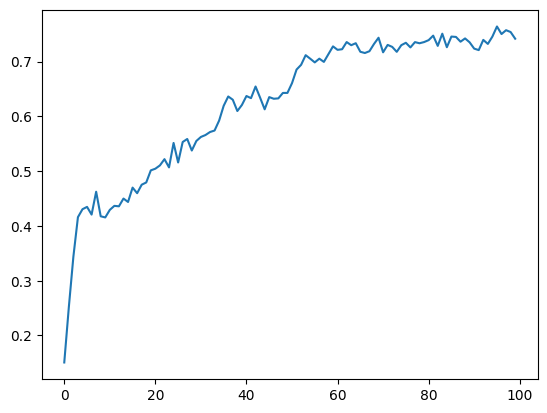

In [93]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"])

In [119]:
parquet = pd.read_parquet("./dataloader/datasets/test_series.parquet")
parquet

,series_id,step,timestamp,anglez,enmo
0,038441c925bb,0,2018-08-14T15:30:00-0400,2.636700,0.0217
1,038441c925bb,1,2018-08-14T15:30:05-0400,2.636800,0.0215
2,038441c925bb,2,2018-08-14T15:30:10-0400,2.637000,0.0216
3,038441c925bb,3,2018-08-14T15:30:15-0400,2.636800,0.0213
4,038441c925bb,4,2018-08-14T15:30:20-0400,2.636800,0.0215
...,...,...,...,...,...
445,0402a003dae9,145,2018-12-18T12:57:05-0500,-59.696899,0.0601
446,0402a003dae9,146,2018-12-18T12:57:10-0500,-35.656601,0.0427
447,0402a003dae9,147,2018-12-18T12:57:15-0500,-21.582399,0.0309
448,0402a003dae9,148,2018-12-18T12:57:20-0500,-42.616001,0.0328


9/9 [==============================] - 1s 95ms/step
train accuracy : 0.7811392552624568
3/3 [==============================] - 0s 66ms/step
test accuracy : 0.7384507275132275


In [167]:
from IPython.display import FileLink
import pandas as pd

# import os
# os.chdir(r'kaggle/working')'
filename = 'train_' +'.csv'
pd.DataFrame(test_mask).to_csv(filename)

FileLink(filename)



ValueError: Must pass 2-d input. shape=(51, 8640, 3)